# Beta diversity

Beta diversity is the diversity **between** communities. Whereas alpha diversity is the *local* diversity, that is the diversity within a community, beta diversity is the diversity which differentiates communities. In microbiome science a community is almost a synonym with sample.

The output from running a beta diversity analysis is matrix with dissimilarities/distances between samples, such that for each pair of samples we will have 1 value denoting how similar or dissimilar the two samples are.

There are tons of different metrics for estimating beta diversity, and only a small subset (the most used) of the metrics will be presented here. 

The three metrics included in this notebook, can be seen as equivalent to the three metrics presented in the alpha diversity notebook:

|**Alpha diversity**| |**Beta diversity**|**Similarities**
|---|---|---|---|
|Observed richness|equivalent to|Jaccard|Based on presence/absence of taxa|
|Shannon diversity|equivalent to|Bray-curtis|Based on relative abundances of taxa|
|Phylogenetic diversity|equivalent to|UniFrac|Uses the phylogenetic tree|

In [1]:
# Load phyloseq object and phyloseq package
library(phyloseq)
load("../data/physeq.RData")

# Contents
* [Jaccard](#jc)
* [Bray-Curtis](#bc)
* [UniFrac](#uf)
* [Ordination](#ord)
* [Clustering](#hc)
* [PERMANOVA](#adonis)

## Jaccard<a class="anchor" id="jc"></a>
Jaccard dissimilarity is a simple dissimilarity metric, which is based solely on presence and absence of taxa:

Jaccard similarity is the the number of taxa that are shared in the two samples, divided by the number of taxa found in either of the two samples. Jaccard dissimilarity is then 1 minus jaccard dissimilarity. Or more formally:
\begin{equation*}
D_{jaccard} = 1 - \frac {|A \cap B|} {|A \cup B|}
\end{equation*}
where A and B are the sets of taxa in the samples.

If the two samples have the exact same taxa, Jaccard dissimilarity will be 0. If the two samples do not share any taxa, Jaccard dissimilarity will be 1.

Note that as Jaccard is based on presence/absence of taxa, it is sensitive to the sequencing depth of the samples. If sequencing depths vary alot it is advised to rarefy before using the Jaccard dissimilarity, or in other ways account for the bias created by varying sequencing depths.

In R:

In [2]:
jac <- distance(phy, method="binary")

Let's look at the first five samples:

(the output is a dist object. It is easier to look at if we convert it to a matrix)

In [3]:
as.matrix(jac)[1:5, 1:5]

,S_027,S_028,S_031,S_034,S_036
S_027,0.0000000,1.0000000,0.9871795,0.9864865,1.000000
S_028,1.0000000,0.0000000,0.9873418,0.9589041,1.000000
S_031,0.9871795,0.9873418,0.0000000,0.9859155,0.987013
S_034,0.9864865,0.9589041,0.9859155,0.0000000,1.000000
S_036,1.0000000,1.0000000,0.9870130,1.0000000,0.000000


As expected, the diagonals are 0, because it is the Jaccard dissimilarity for each sample with itself.
The remaining are quite high, showing that few taxa are shared across these samples.

## Bray-Curtis<a class="anchor" id="bc"></a>
Bray-Curtis is a commonly used dissimilarity metric, which is based on the shared relative abundance of taxa between the samples.

It is calculated using the formula:
\begin{equation*}
D_{bray-curtis} = 1 - \frac {2*C_{ij}} {S_i + S_j}
\end{equation*}
where Si is the number of taxa in sample i, Sj is the number of taxa in sample j. To calculate Cij, all the shared taxa are found, then for each shared taxa the lowest relative abundance is found, and Cij is the sum of these relative abundances. 

We can see that with Bray-Curtis two samples can have a high dissimilarity, even though they share most taxa, if the shared taxa have low relative abundance in any of the two samples.

Conversely, two samples can have a low Bray-Curtis dissimilarity, even though they share few taxa, if these shared taxa have high relative abundance in both samples.

Bray-Curtis is therefore less sensitive to noise and sequencing depth than Jaccard dissimilarity.


In R:

In [4]:
bc <- distance(phy, method="bray")

Let's look at the first five samples:

In [5]:
as.matrix(bc)[1:5, 1:5]

,S_027,S_028,S_031,S_034,S_036
S_027,0.0000000,1.0000000,0.9995761,0.9993008,1.0000000
S_028,1.0000000,0.0000000,0.9997336,0.9994667,1.0000000
S_031,0.9995761,0.9997336,0.0000000,0.9983071,0.9999566
S_034,0.9993008,0.9994667,0.9983071,0.0000000,1.0000000
S_036,1.0000000,1.0000000,0.9999566,1.0000000,0.0000000


## UniFrac<a class="anchor" id="uf"></a>
UniFrac is popular dissimilarity metric, and it is based on the phylogenetic tree. There are two variants of UniFrac, an unweighted and a weighted version. The only difference between these is that the unweighted is based on presence/absence of taxa, and the weighted is incorporating the relative abundances of the taxa.

UniFrac measures dissimilarity by finding the total branch length of all taxa that not shared in the two samples, this is divided by the total branch length in the phylogenetic tree: 

![UniFrac example](../img/uf.jpg)

In the weighted UniFrac, the branch lenghts are weighted by the relative abundances of the taxa.

With UniFrac, two samples can have a low dissimilarity even though no taxa are shared at all. But if the taxa in the two samples are closely related (close on the phylogenetic tree), the samples will be similar with the UniFrac.

Note that with unweighted UniFrac outliers can have a large influence. For example, a single Archaeal taxa in a tree with mostly Bacteria, will have a long branch length and thereby a large influence on the UniFrac dissimilarity.

Furthermore, UniFrac will change if the tree is rooted differently. Make sure the tree is correctly rooted before using the UniFrac dissimilarity.

In R:

In [6]:
uf <- UniFrac(phy, weighted=FALSE)

Let's look at the first five samples:

In [7]:
as.matrix(uf)[1:5, 1:5]

,S_027,S_028,S_031,S_034,S_036
S_027,0.0000000,0.9546747,0.9303890,0.8777381,0.9336149
S_028,0.9546747,0.0000000,0.9309235,0.9429186,0.9262885
S_031,0.9303890,0.9309235,0.0000000,0.9259965,0.9425261
S_034,0.8777381,0.9429186,0.9259965,0.0000000,0.9252860
S_036,0.9336149,0.9262885,0.9425261,0.9252860,0.0000000


And the weighted UniFrac:

In [8]:
wuf <- UniFrac(phy, weighted=TRUE)
as.matrix(wuf)[1:5, 1:5]

,S_027,S_028,S_031,S_034,S_036
S_027,0.0000000,0.12221968,0.2269796,0.18372918,0.17944620
S_028,0.1222197,0.00000000,0.1279469,0.07498613,0.06774706
S_031,0.2269796,0.12794687,0.0000000,0.18920615,0.18609225
S_034,0.1837292,0.07498613,0.1892062,0.00000000,0.12576251
S_036,0.1794462,0.06774706,0.1860923,0.12576251,0.00000000


It is apparent that the weighted UniFrac dissimilarities are much lower than all the other beta diversity metrics. Even though few taxa are shared across the samples, the most abundant taxa in the samples are closely related, and the samples are therefore phylogenetically similar.

## Ordination<a class="anchor" id="ord"></a>
The usual way to visualize beta diversity is through ordination plots. PCoA is the most common ordination used for dissimilarity matrices and is explained in detail in the Statistics 102 notebook.

In R:

There is a convinient function which does the ordination and plotting for us. Here we ordinate the unweighted UniFrac matrix and color by Time. The ellipses highlight the time points.

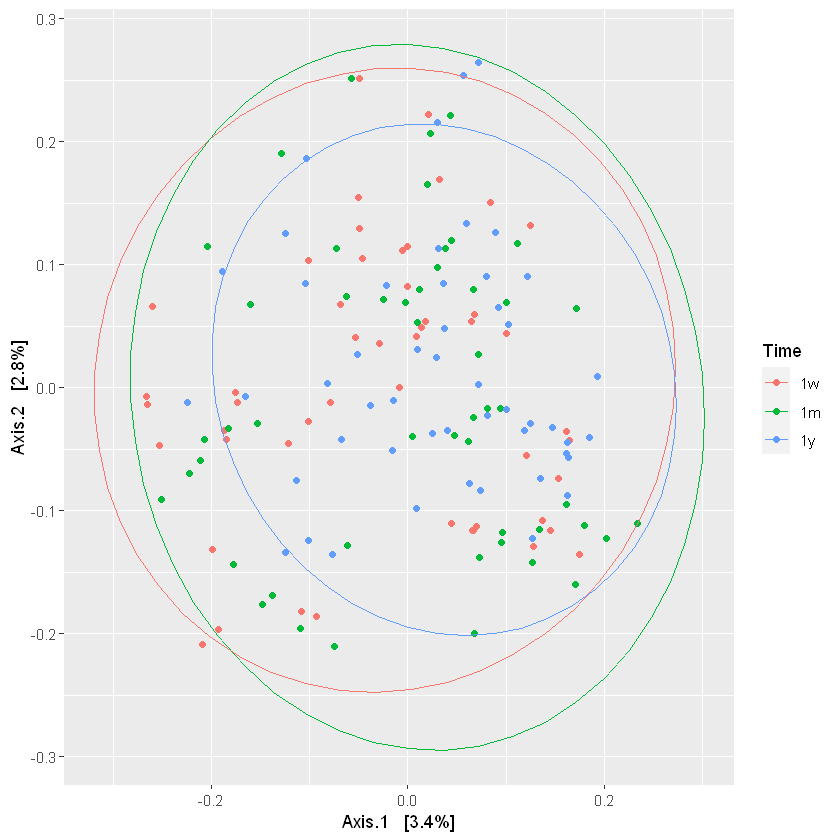

In [9]:
library(ggplot2)

wuf_ord <- ordinate(phy, "PCoA", "UniFrac", weighted=FALSE)
plot_ordination(phy, wuf_ord, type="samples", color="Time") +
    stat_ellipse()

# PERMANOVA<a class="anchor" id="adonis"></a>
PERMANOVA is the most used method to test statistical hypothesis on beta diversities. See more details in the Statistics 102 notebook.

In R:

In [11]:
library(vegan)
adonis(jac ~ Time, data = data.frame(sample_data(phy)))


Call:
adonis(formula = jac ~ Time, data = data.frame(sample_data(phy))) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Time        2     1.111 0.55560  1.1483 0.01538  0.001 ***
Residuals 147    71.124 0.48383         0.98462           
Total     149    72.235                 1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1